In [1]:
import pandas as pd
import numpy as np
import plotly.express
from sklearn.manifold import TSNE
from gtda.time_series import embedding, TakensEmbedding
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
temp = pd.read_csv('./data/temp.csv')
stock = pd.read_csv('./data/TSLA.csv')

In [3]:
stock = stock.iloc[:1000]
stock = stock[['close', 'time']]
stock['time'] = pd.to_datetime(stock['time'])
stock = stock.set_index('time')

temp = temp[['date', 'meantemp']]
temp['date'] = pd.to_datetime(temp['date'])
temp = temp.set_index('date')

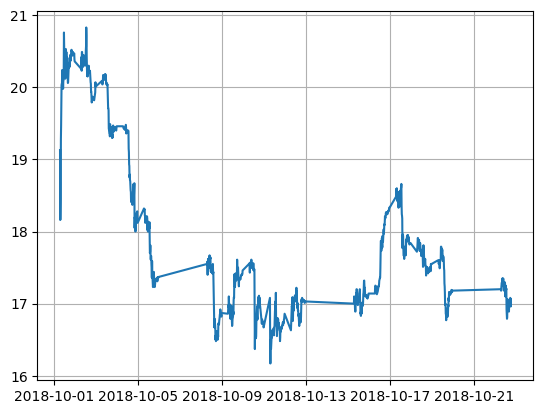

In [4]:
plt.plot(stock)
plt.grid()

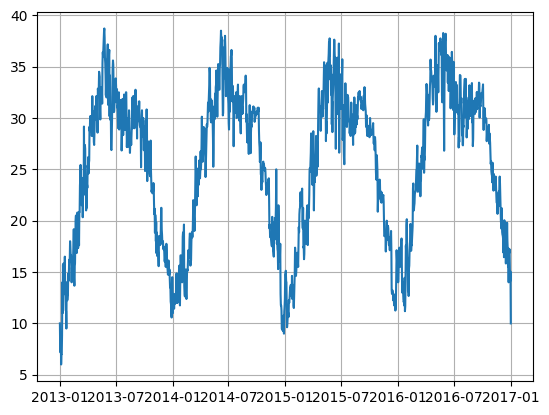

In [5]:
plt.plot(temp)
plt.grid()

## Вычисляем размерность вложения

In [6]:
optimal_time_delay, optimal_embedding_dimension = embedding.takens_embedding_optimal_parameters(
    stock['close'], 100, 10, stride=1
)

In [7]:
print(f"embedding:{optimal_embedding_dimension}\ndelay:{optimal_time_delay}")

embedding:7
delay:83


In [8]:
phase = TakensEmbedding(optimal_time_delay, optimal_embedding_dimension).fit_transform(stock['close'].values.reshape(1, -1))[0]
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
results = tsne.fit_transform(phase)

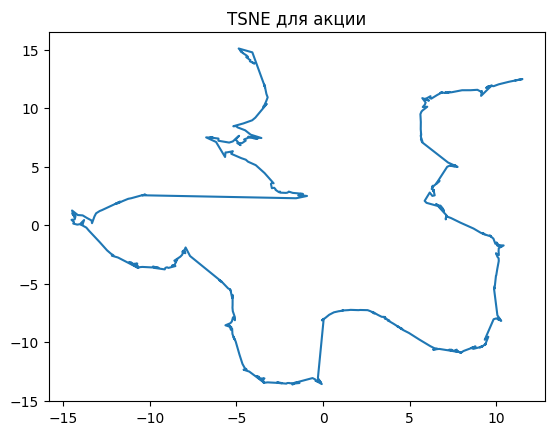

In [9]:
plt.plot(results[:, 0], results[:, 1])
plt.title('TSNE для акции')
plt.show()

In [10]:
optimal_time_delay, optimal_embedding_dimension = embedding.takens_embedding_optimal_parameters(
    temp['meantemp'], 100, 10, stride=1
)

In [11]:
phase = TakensEmbedding(optimal_time_delay, optimal_embedding_dimension).fit_transform(temp['meantemp'].values.reshape(1, -1))[0]
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
results = tsne.fit_transform(phase)

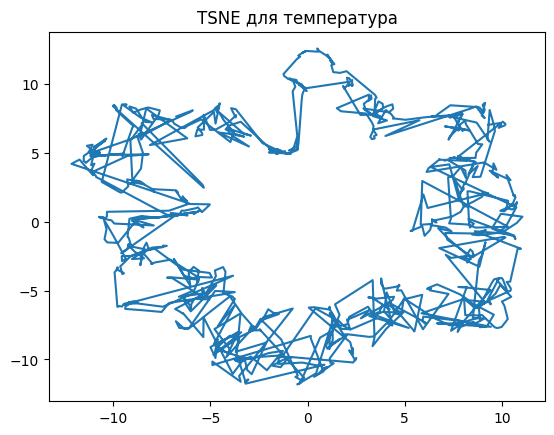

In [12]:
plt.plot(results[:, 0], results[:, 1])
plt.title('TSNE для температура')
plt.show()

# Трехмерный график

In [13]:
phase = TakensEmbedding(optimal_time_delay, optimal_embedding_dimension).fit_transform(stock['close'].values.reshape(1, -1))[0]
tsne = TSNE(n_components=3)
phase_traj_proj = tsne.fit_transform(phase)

In [14]:
fig = plotly.express.line_3d(pd.DataFrame(phase_traj_proj, columns=['x', 'y', 'z']), x="x", y="y", z="z")

fig.show()

In [15]:
phase = TakensEmbedding(optimal_time_delay, optimal_embedding_dimension).fit_transform(temp['meantemp'].values.reshape(1, -1))[0]
tsne = TSNE(n_components=3)
phase_traj_proj = tsne.fit_transform(phase)

In [16]:
fig = plotly.express.line_3d(pd.DataFrame(phase_traj_proj, columns=['x', 'y', 'z']), x="x", y="y", z="z")

fig.show()